In [11]:
%run algorithms.ipynb

In [12]:
def ucitaj_grafove_iz_dir(direktorijum='data_sets'):
    ucitani_grafovi = []

    for ime_fajla in os.listdir(direktorijum):
        if ime_fajla.endswith(".pkl"):
            putanja = os.path.join(direktorijum, ime_fajla)
            with open(putanja, 'rb') as file:
                ucitani_graf = pickle.load(file)
                ucitani_grafovi.append(ucitani_graf)

    return ucitani_grafovi

In [13]:
ucitani_grafovi = ucitaj_grafove_iz_dir()

In [14]:
def ispisi_informacije_o_grafu(indeks,bf = False):
    direktorijum='data_sets'
    ime_fajla = f'graf_{indeks}.pkl'
    putanja = os.path.join(direktorijum, ime_fajla)

    if os.path.exists(putanja):
        with open(putanja, 'rb') as file:
            ucitani_graf = pickle.load(file)
            print(f"Informacije o grafu {indeks}:")
            print(f"  Broj čvorova: {len(ucitani_graf.nodes)}")
            print(f"  Broj grana: {len(ucitani_graf.edges)}\n")
            final_solution1, final_solution2 = vns_algorithm(ucitani_graf, 4, 10)
            print(f'Broj grana prvog vns resenja je: {len(final_solution1.edges)} a broj grana drugog vns resenja je {len(final_solution2.edges)}\n')
            if bf is True:
                optimal_solution = brute_force_min_k_connected_subgraph(ucitani_graf, 4)
                print(f'Broj grana optimalnog resenja je: {len(optimal_solution.edges)}')
            final_solution, elapsed_time_greedy = greedy_algorithm(ucitani_graf, 4, 50)
            print(f'Broj grana greedy resenja je: {len(final_solution.edges)}')
            print(f'Vreme potrebno za izvrsavanje greedy algoritma: {elapsed_time_greedy:.3f} seconds')
            
            
    else:
        print(f"Graf {indeks} ne postoji u direktorijumu {direktorijum}.")

In [15]:
for i in range(1,11):
    bf = True
    if i > 1:
        bf = False
    ispisi_informacije_o_grafu(i,bf)
    print("-----------------------------------------------------")

Informacije o grafu 1:
  Broj čvorova: 10
  Broj grana: 30

Broj grana prvog vns resenja je: 20 a broj grana drugog vns resenja je 20

Broj grana optimalnog resenja je: 20
Broj grana greedy resenja je: 20
Vreme potrebno za izvrsavanje greedy algoritma: 0.146 seconds
-----------------------------------------------------
Informacije o grafu 2:
  Broj čvorova: 20
  Broj grana: 60

Broj grana prvog vns resenja je: 40 a broj grana drugog vns resenja je 40

Broj grana greedy resenja je: 40
Vreme potrebno za izvrsavanje greedy algoritma: 0.259 seconds
-----------------------------------------------------
Informacije o grafu 3:
  Broj čvorova: 30
  Broj grana: 90

Broj grana prvog vns resenja je: 60 a broj grana drugog vns resenja je 60

Broj grana greedy resenja je: 60
Vreme potrebno za izvrsavanje greedy algoritma: 0.498 seconds
-----------------------------------------------------
Informacije o grafu 4:
  Broj čvorova: 40
  Broj grana: 120

Broj grana prvog vns resenja je: 80 a broj grana d

Pocetni podgraf ima grana: 30


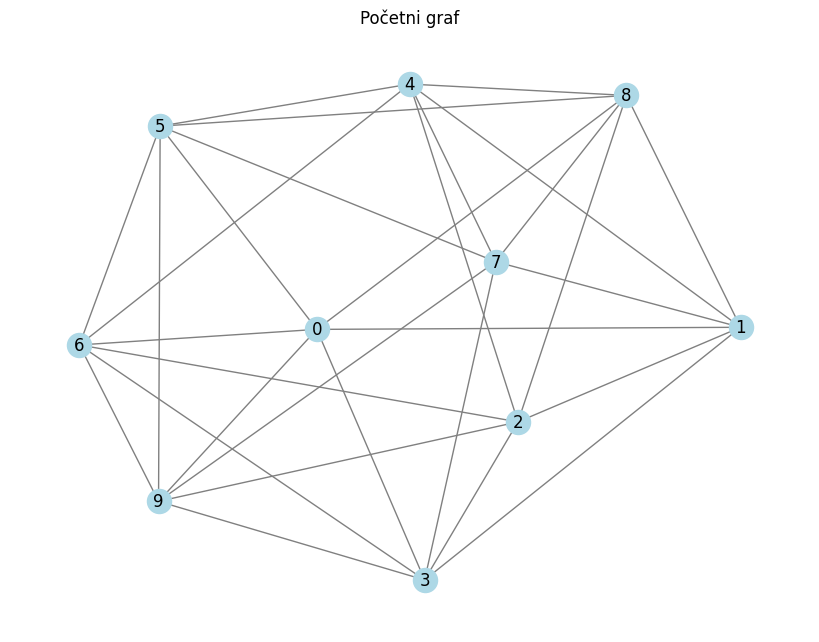

Graf dobijen prvim VNS-om ima grana: 20


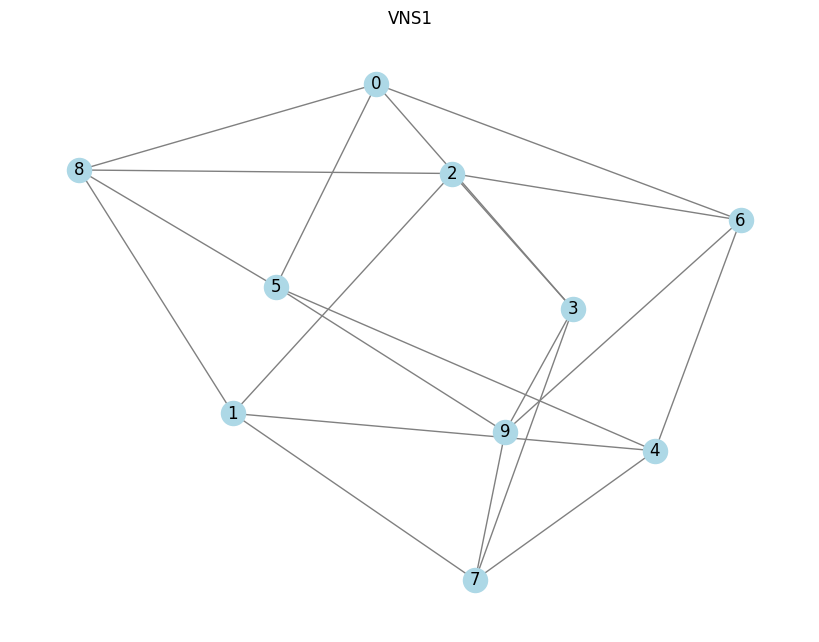

Graf dobijen drugim VNS-om ima grana: 20


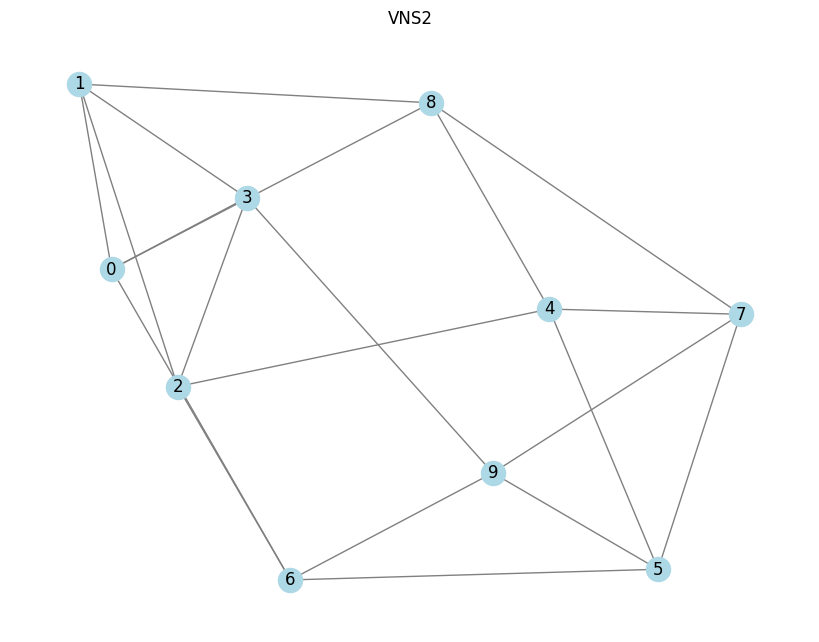

Graf dobijen pohlepnim algoritmom ima grana: 20


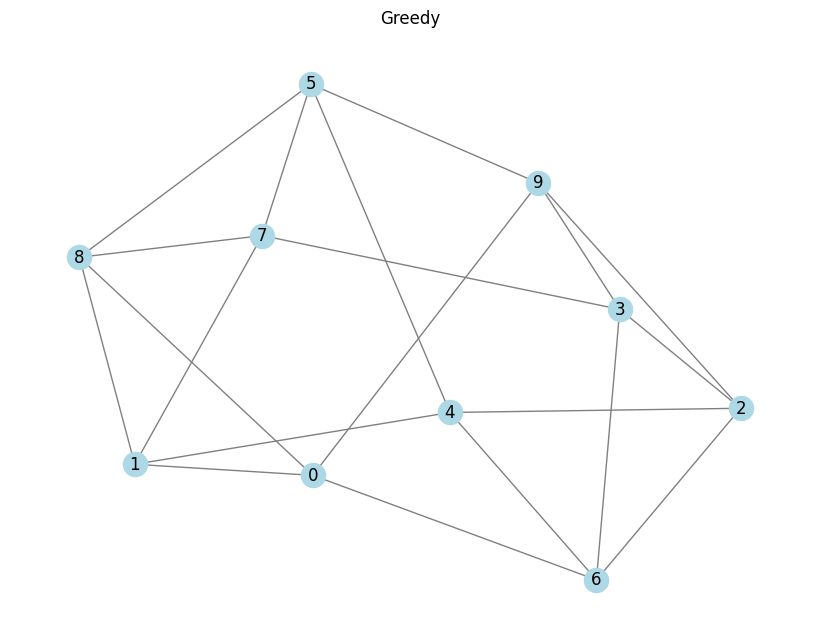

Graf dobijen drugim brute force-om ima grana: 20


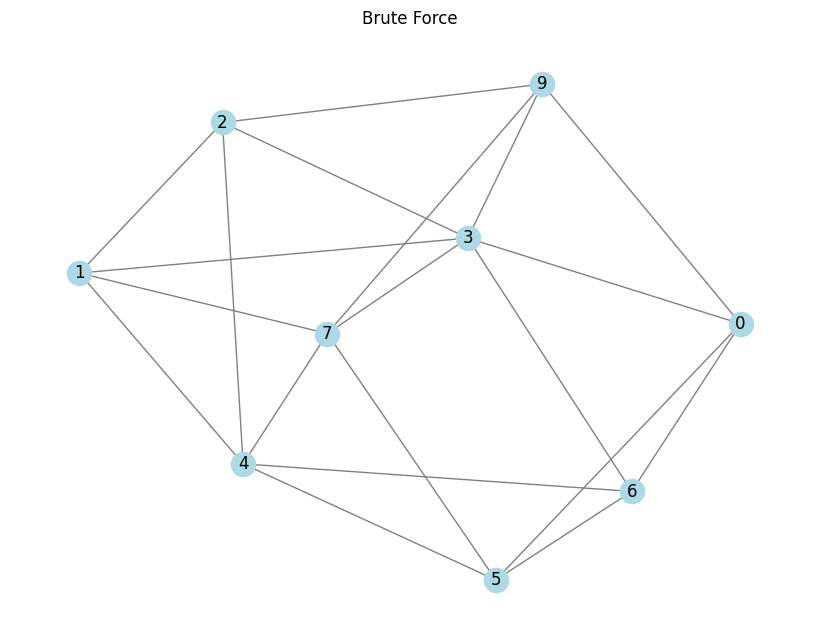

In [53]:
direktorijum='data_sets'
ime_fajla = 'graf_1.pkl'
putanja = os.path.join(direktorijum, ime_fajla)

if os.path.exists(putanja):
    with open(putanja, 'rb') as file:
        ucitani_graf = pickle.load(file)

print("Pocetni podgraf ima grana:", len(ucitani_graf.edges()))
plt.figure(figsize=(8, 6))
nx.draw(ucitani_graf, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Početni graf")
plt.show()

final_solution1, final_solution2 = vns_algorithm(ucitani_graf, 4, 10)
print("Graf dobijen prvim VNS-om ima grana:", len(final_solution1.edges()))
plt.figure(figsize=(8, 6))
nx.draw(final_solution1, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("VNS1")
plt.show()

print("Graf dobijen drugim VNS-om ima grana:", len(final_solution2.edges()))
plt.figure(figsize=(8, 6))
nx.draw(final_solution2, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("VNS2")
plt.show()

final_solution, elapsed_time_greedy = greedy_algorithm(ucitani_graf, 4, 50)
print("Graf dobijen pohlepnim algoritmom ima grana:", len(final_solution.edges()))
plt.figure(figsize=(8, 6))
nx.draw(final_solution, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Greedy")
plt.show()

optimal_solution = brute_force_min_k_connected_subgraph(ucitani_graf, 4)
print("Graf dobijen drugim brute force-om ima grana:", len(optimal_solution.edges()))
plt.figure(figsize=(8, 6))
nx.draw(optimal_solution, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Brute Force")
plt.show()